In [1]:
""" 
Problem definition:
Classifiy people with diabetes using Kaggle 'diabetes2.csv' dataset
Use Support Vector Classifier (SVC) with Cross Validation and Hyper Parameter Tuning

"""

" \nProblem definition:\nClassifiy people with diabetes using Kaggle 'diabetes2.csv' dataset\nUse Support Vector Classifier (SVC) with Cross Validation and Hyper Parameter Tuning\n\n"

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.5)

In [3]:
# read data

data = pd.read_csv('diabetes2.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# info does not show missing data

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
# 'Outcome' is our labels column and the rest are features
# notice that there are lots of 0 in the Insulin column; 
# there are some 0s in SkinThickness and in BloodPressure with these being in the same rows as Insulin
# since the values of these factors cannot be 0, this means that these represent missing data (hidden nulls)
# it helps to re-order data by Insulin values in ascending order to visualize better

data = data.sort_values('Insulin')

data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
443,8,108,70,0,0,30.5,0.955,33,1
440,0,189,104,25,0,34.3,0.435,41,1
439,6,107,88,0,0,36.8,0.727,31,0
438,1,97,70,15,0,18.2,0.147,21,0
437,5,147,75,0,0,29.9,0.434,28,0
436,12,140,85,33,0,37.4,0.244,41,0
435,0,141,0,0,0,42.4,0.205,29,1
434,1,90,68,8,0,24.5,1.138,36,0
433,2,139,75,0,0,25.6,0.167,29,0


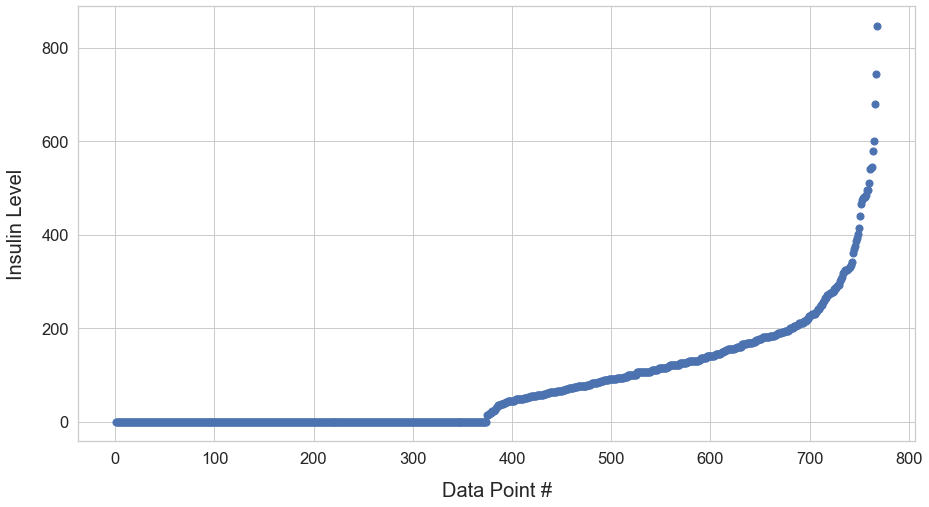

In [7]:
# now we can clearly see that the Insulin column has many 0 values

# let's visualize by plotting the Insulin level values

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data) + 1), data['Insulin'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Insulin Level', fontsize = 20, labelpad = 15)
plt.show()

In [8]:
# close to 380 data points have missing insulin levels data

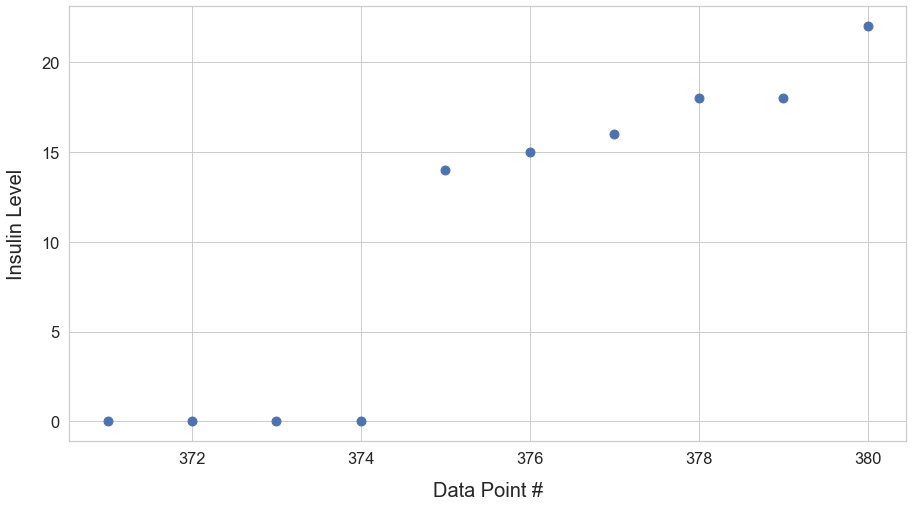

In [9]:
# let's zoom in

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(371, 381), data['Insulin'].iloc[370:380], s = 80, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Insulin Level', fontsize = 20, labelpad = 15)
plt.show()

In [10]:
# yes, the first 374 points out of 768 entries in Insulin column are missing values
# this is a large amount of missing data which we clearly cannot impute
# Insulin level is critical feature in detecting diabetes, thus, we will need to use only data with non-zero values

data = data.iloc[374:, :] # select all data points beyond point with index 373 (indices start with 0)
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
617,2,68,62,13,15,20.1,0.257,23,0
760,2,88,58,26,16,28.4,0.766,22,0
108,3,83,58,31,18,34.3,0.336,25,0
566,1,99,72,30,18,38.6,0.412,21,0
711,5,126,78,27,22,29.6,0.439,40,0
182,1,0,74,20,23,27.7,0.299,21,0
52,5,88,66,21,23,24.4,0.342,30,0
597,1,89,24,19,25,27.8,0.559,21,0
323,13,152,90,33,29,26.8,0.731,43,1


In [11]:
# seems data is clean now, however, check the suspect features again by plotting

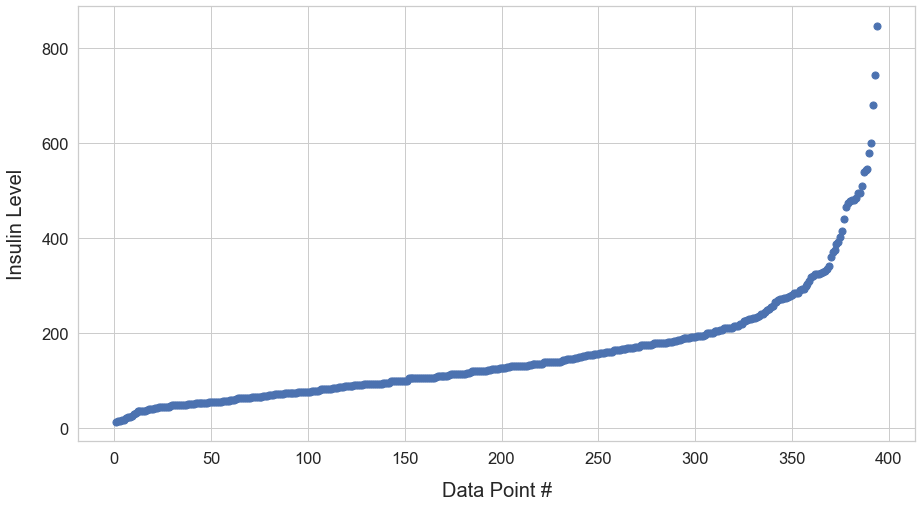

In [12]:
# plot of Insulin levels after 0s removal

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data) + 1), data['Insulin'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Insulin Level', fontsize = 20, labelpad = 15)
plt.show()

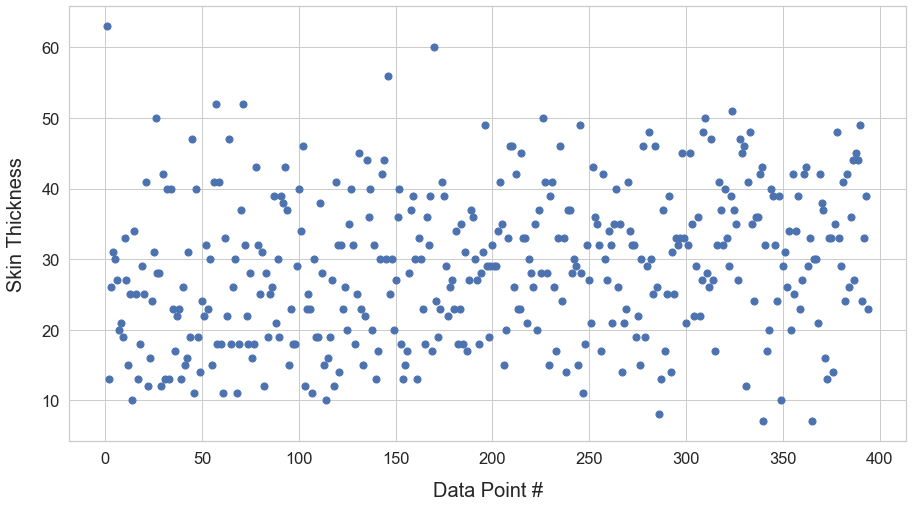

In [13]:
# plot of SkinThickness values

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data) + 1), data['SkinThickness'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Skin Thickness', fontsize = 20, labelpad = 15)
plt.show()

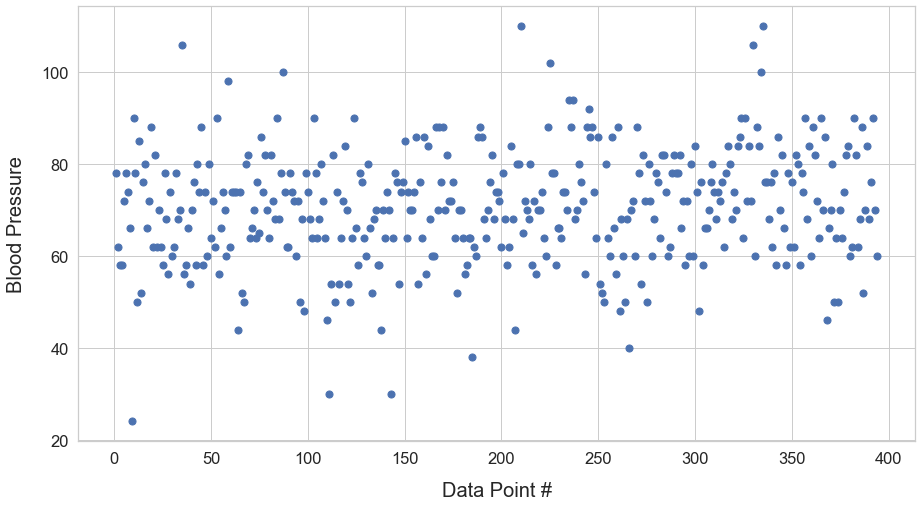

In [14]:
# plot of Blood Pressure values

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data) + 1), data['BloodPressure'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Blood Pressure', fontsize = 20, labelpad = 15)
plt.show()

In [15]:
# we have got ridden of 0 values in these columns
# however, although we are not medical experts, values for the blood pressure low level below 40 are highly unlikely
# if we set a threshold of 35 we will have only three points out of range
# since this is a small percantege of the total points (< 1%) we can eliminate the entire rows with such blood pressure values

In [16]:
data = data[data['BloodPressure'] > 35]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 445 to 13
Data columns (total 9 columns):
Pregnancies                 391 non-null int64
Glucose                     391 non-null int64
BloodPressure               391 non-null int64
SkinThickness               391 non-null int64
Insulin                     391 non-null int64
BMI                         391 non-null float64
DiabetesPedigreeFunction    391 non-null float64
Age                         391 non-null int64
Outcome                     391 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.5 KB


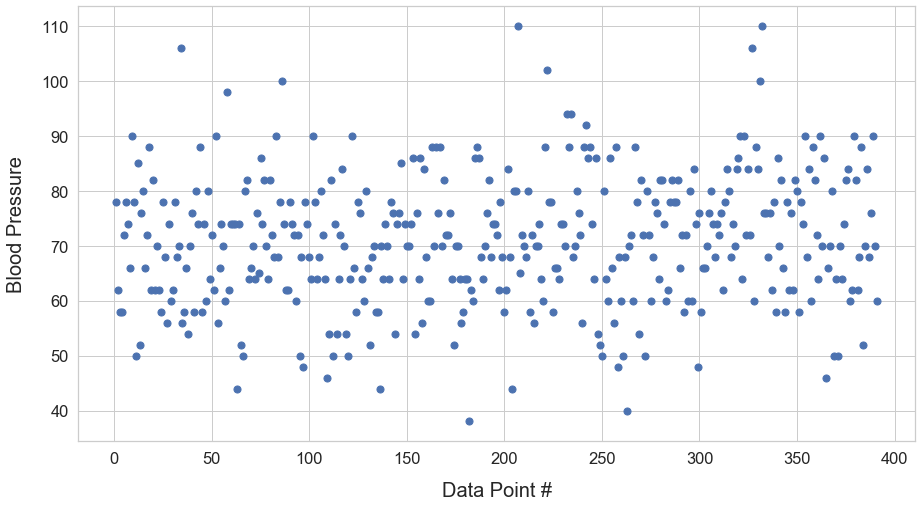

In [17]:
# plot Blood Pressure again to insure everything is right

plt.figure(figsize = (15, 8))
plt.scatter(np.arange(1, len(data) + 1), data['BloodPressure'], s = 50, c = 'b')
plt.xlabel('Data Point #', fontsize = 20, labelpad = 15)
plt.ylabel('Blood Pressure', fontsize = 20, labelpad = 15)
plt.show()

In [18]:
# data is good
# let's take a look at data again

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
445,0,180,78,63,14,59.4,2.420,25,1
617,2,68,62,13,15,20.1,0.257,23,0
760,2,88,58,26,16,28.4,0.766,22,0
108,3,83,58,31,18,34.3,0.336,25,0
566,1,99,72,30,18,38.6,0.412,21,0
711,5,126,78,27,22,29.6,0.439,40,0
182,1,0,74,20,23,27.7,0.299,21,0
52,5,88,66,21,23,24.4,0.342,30,0
323,13,152,90,33,29,26.8,0.731,43,1
225,1,87,78,27,32,34.6,0.101,22,0


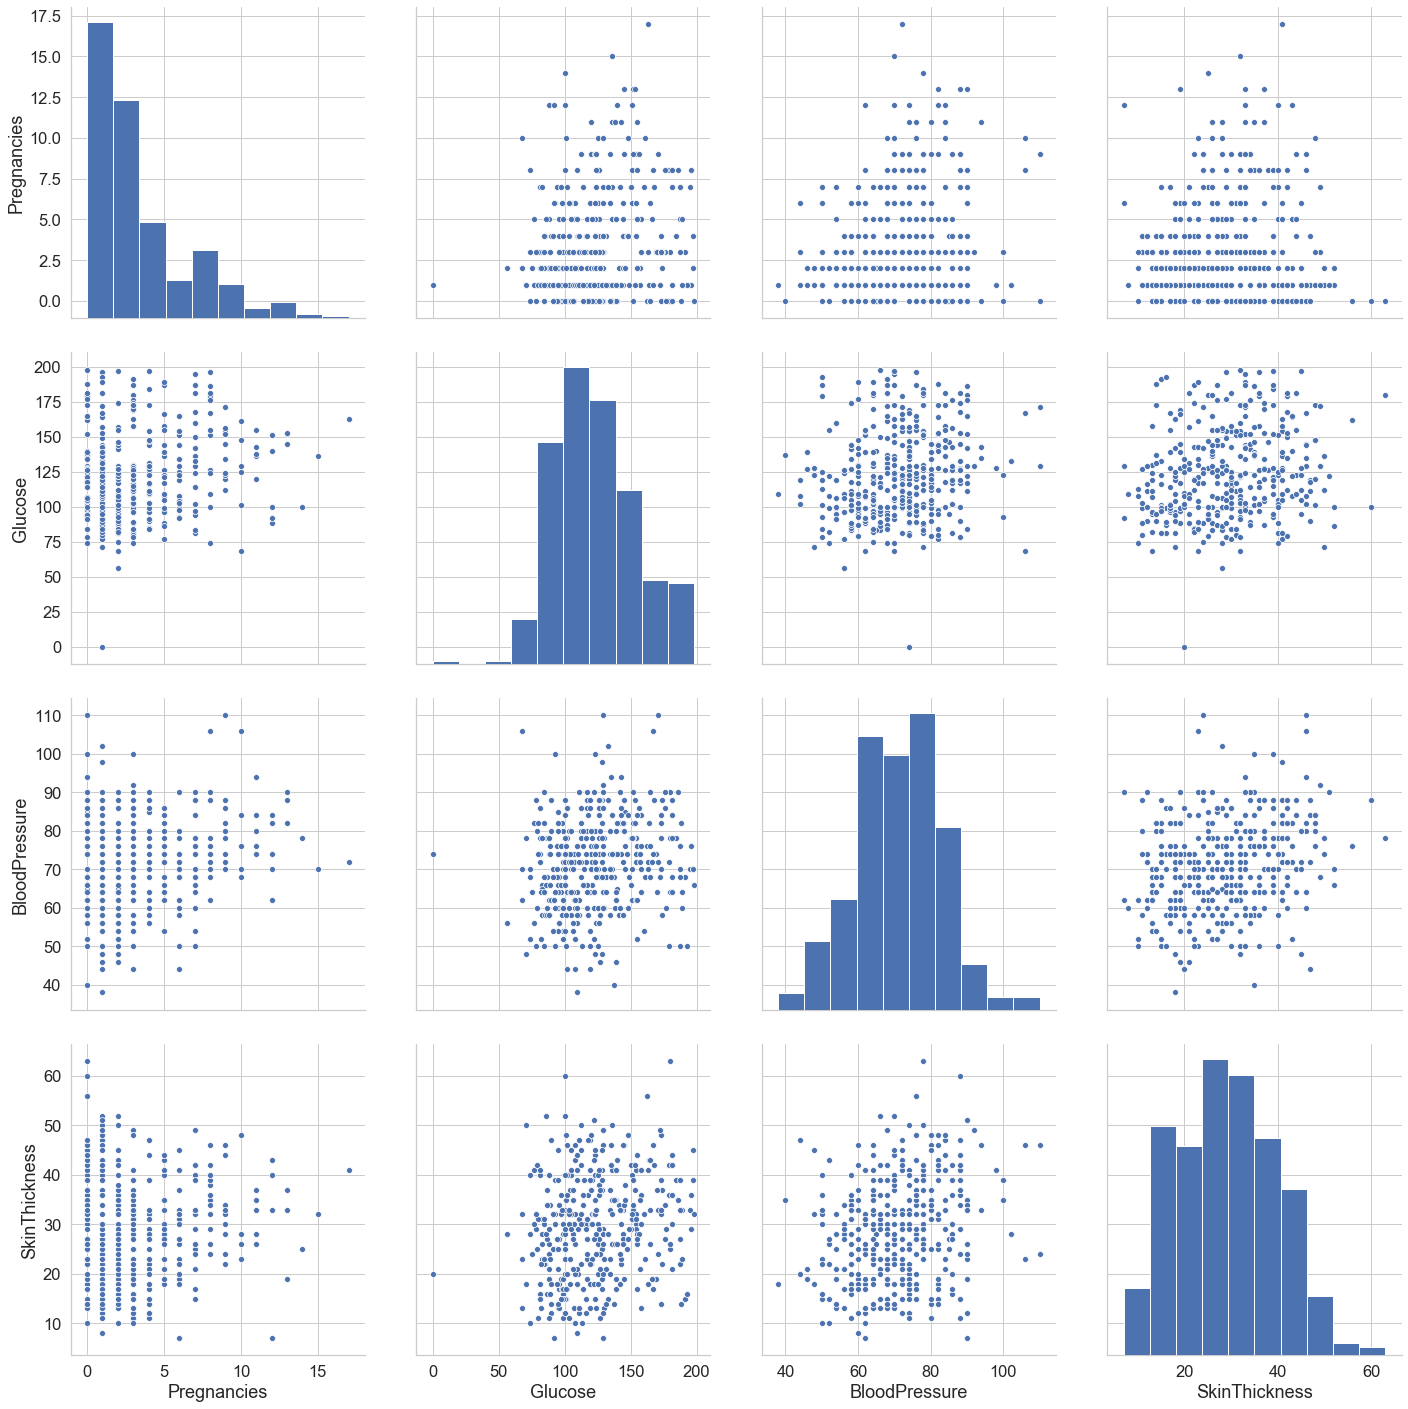

In [19]:
# finish our data exploration with pair plots

# 1st half of features

sns.pairplot(data.iloc[:, 0:4], height = 5, aspect = 1)
plt.tight_layout
plt.show()

In [20]:
# the distributions of the features do not appear unsual and there does not appear strong correlation between the features
# however, we see that we have missed a point with Glucose level = 0 --> will need to eliminate that entry

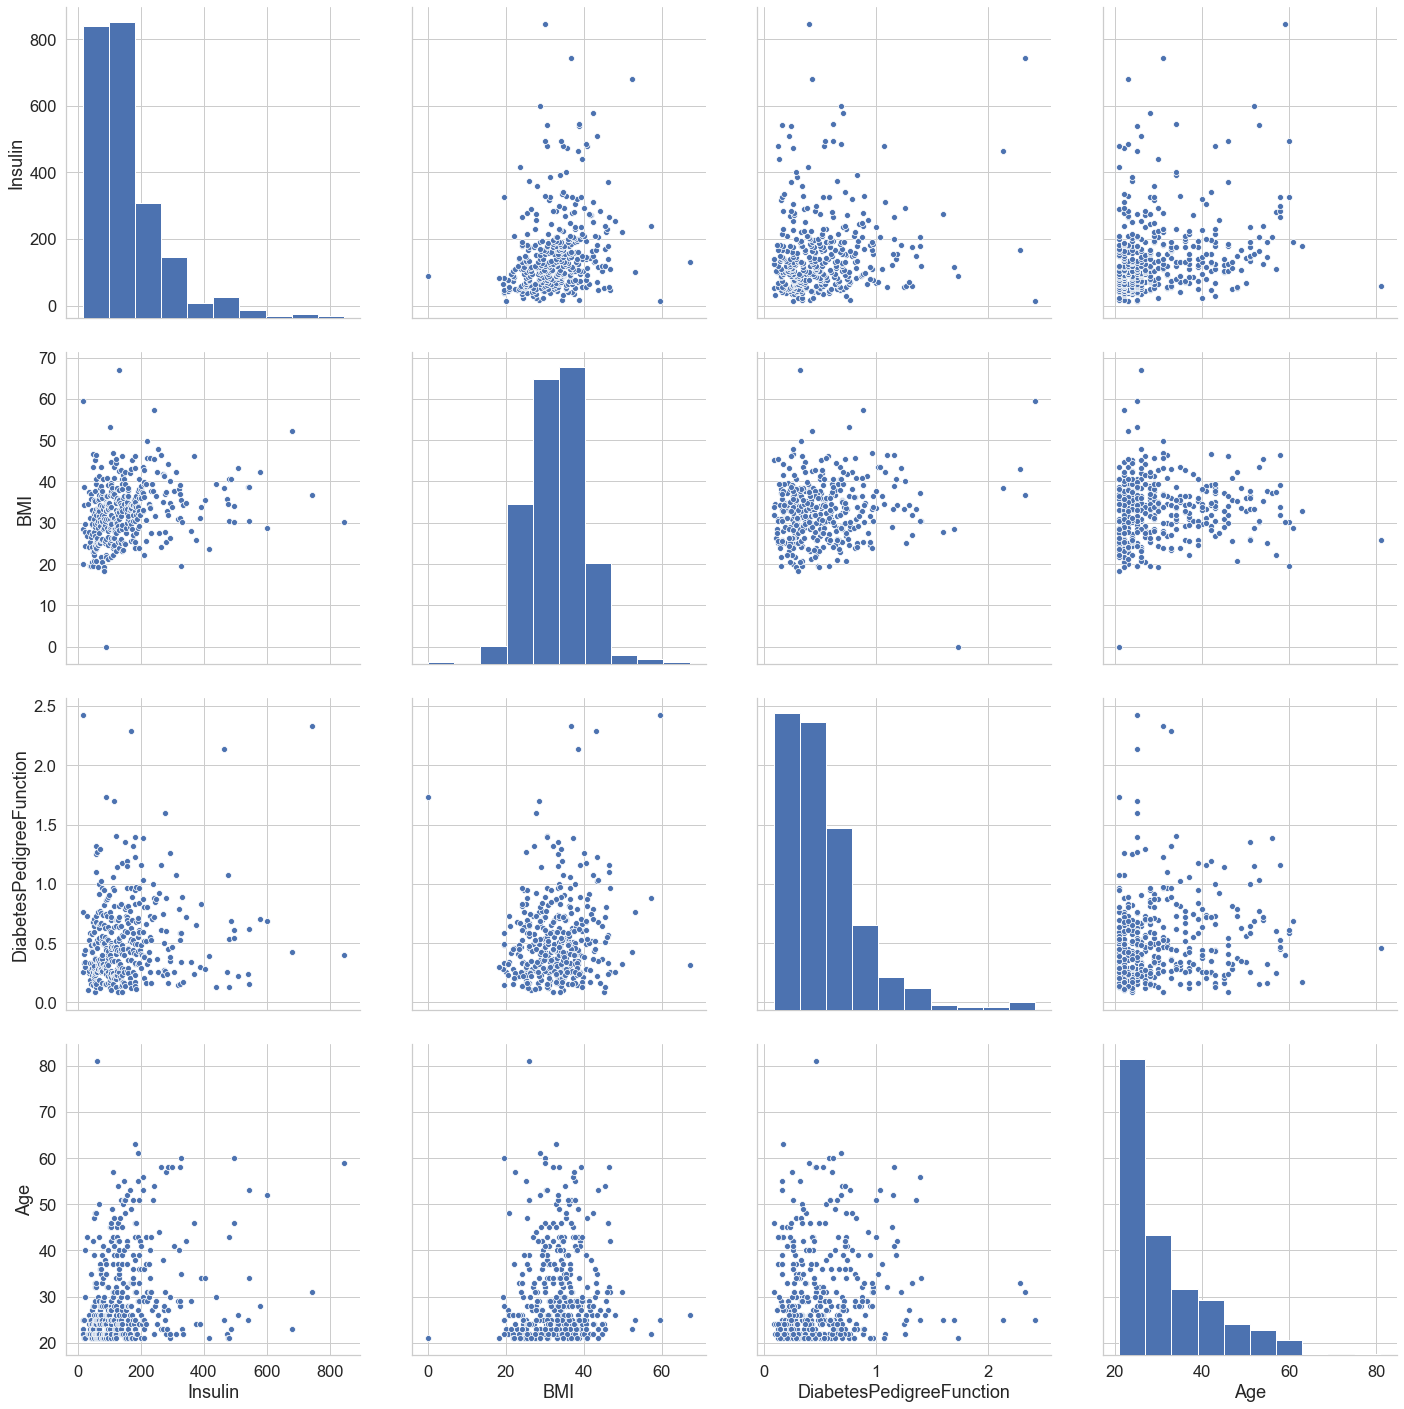

In [21]:
# 2nd half of features

sns.pairplot(data.iloc[:, 4:-1], height = 5, aspect = 1)
plt.tight_layout
plt.show()

In [22]:
# there is nothing that strikes us as unusual (for non-experts in diabetes)
# however, here too, we have a point with BMI = 0 --> eliminate that entry, as well

In [23]:
data = data[data['Glucose'] > 1] # setting threshold slightly above 0
data = data[data['BMI'] > 1]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 445 to 13
Data columns (total 9 columns):
Pregnancies                 389 non-null int64
Glucose                     389 non-null int64
BloodPressure               389 non-null int64
SkinThickness               389 non-null int64
Insulin                     389 non-null int64
BMI                         389 non-null float64
DiabetesPedigreeFunction    389 non-null float64
Age                         389 non-null int64
Outcome                     389 non-null int64
dtypes: float64(2), int64(7)
memory usage: 30.4 KB


In [24]:
# finally, we have clean data with 389 total data points

# from data select features, X, and target, y

X = data.iloc[:, :-1].values # all columns but Outcome which is our target/labels column
y = data.iloc[:, -1].values # last column, Outcome

In [25]:
# use SVC

In [26]:
# scale X since SVC uses distance as a measure of separation between points

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [27]:
# split in train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
from sklearn.svm import SVC
svc = SVC(gamma='scale', random_state = 0)

In [29]:
svc = svc.fit(X_train, y_train)

y_pred_0 = svc.predict(X_test) # good practice is to index the predictions in case you want to compare with later results

In [30]:
# compare predictions, y_pred_0, with test data, y_test

from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_0))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred_0))

Confusion Matrix:
[[51  4]
 [ 8 15]]


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        55
           1       0.79      0.65      0.71        23

    accuracy                           0.85        78
   macro avg       0.83      0.79      0.80        78
weighted avg       0.84      0.85      0.84        78



In [31]:
# run cross validation to get avg score and std

from sklearn.model_selection import cross_val_score

all_accuracies = cross_val_score(estimator = svc, X = X, y = y, scoring = 'f1_macro', cv = 10)

print('All Accuracies:')
print(all_accuracies)
print('\n')
print('mean accuracy: ', round(np.mean(all_accuracies), 3))
print('std: ', round(np.std(all_accuracies), 3))

All Accuracies:
[0.66152363 0.66152363 0.64160401 0.79827586 0.68688671 0.72252964
 0.61735849 0.8583878  0.71111111 0.5210084 ]


mean accuracy:  0.688
std:  0.089


In [32]:
# the CV avg accuracy is significantly lower than that of our initial model

In [33]:
# optimize by using GridSearchCV

from sklearn.model_selection import GridSearchCV

# set grid parameters as dictionary to define the GridSearch using the two most important parameters C and gamma
grid_params = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']}

svc_grid = GridSearchCV(SVC(), grid_params, refit = True, verbose = 3, cv = 5, n_jobs = -1)

svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  57 out of  80 | elapsed:    1.8s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    1.9s finished
C:\Users\marin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [34]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
# run CV with best_estimator

svc_opt = svc_grid.best_estimator_

all_accuracies = cross_val_score(estimator = svc_opt, X = X, y = y, scoring = 'f1_macro', cv = 10)

print('All Accuracies:')
print(all_accuracies)
print('\n')
print('mean accuracy: ', round(np.mean(all_accuracies), 3))
print('std: ', round(np.std(all_accuracies), 3))

All Accuracies:
[0.60685484 0.66152363 0.54772525 0.83709273 0.73103448 0.72252964
 0.67622642 0.87962963 0.78333333 0.54982578]


mean accuracy:  0.7
std:  0.108


In [36]:
# only marginal improvement

In [37]:
# define finer grid for further optimization

grid_params = {'C': [1, 2, 3, 4, 5], 'gamma': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], 'kernel': ['rbf']}

svc_grid = GridSearchCV(SVC(), grid_params, refit = True, verbose = 3, cv = 5, n_jobs = -1)

svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5],
                         'gamma': [0.005, 0.01, 0.015, 0.02, 0.025, 0.03],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [38]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.005, 'kernel': 'rbf'}

In [39]:
# one last iteration of the search grid

grid_params = {'C': [1], 'gamma': [0.003, 0.004, 0.005, 0.006, 0.007], 'kernel': ['rbf']}

svc_grid = GridSearchCV(SVC(), grid_params, refit = True, verbose = 3, cv = 5, n_jobs = -1)

svc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1], 'gamma': [0.003, 0.004, 0.005, 0.006, 0.007],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [40]:
svc_grid.best_params_

{'C': 1, 'gamma': 0.006, 'kernel': 'rbf'}

In [41]:
# we will stop here with optimization

In [42]:
# run CV with best_estimator

svc_opt = svc_grid.best_estimator_

all_accuracies = cross_val_score(estimator = svc_opt, X = X, y = y, scoring = 'f1_macro', cv = 10)

print('All Accuracies:')
print(all_accuracies)
print('\n')
print('mean accuracy: ', round(np.mean(all_accuracies), 3))
print('std: ', round(np.std(all_accuracies), 3))

All Accuracies:
[0.60685484 0.66152363 0.56666667 0.79827586 0.63888889 0.74675325
 0.69907407 0.87962963 0.80788177 0.54982578]


mean accuracy:  0.696
std:  0.105


In [43]:
# despite the model tuning we could not improve further; we also note that the variance of the predictions is rather large
# conclusion: SVC model predicts the outcome for diabetes from this data with an average accuracy of 70%